<a href="https://colab.research.google.com/github/Shamshuddeen-nadaf/Deep_Learning_OCR_CNN_LSTM/blob/main/ocr_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers, models, optimizers

hybrid_model = models.Sequential()

hybrid_model.add(layers.Input(shape=(28, 28, 1)))
hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))

hybrid_model.add(layers.Conv2D(64, (4, 4)))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Reshape(target_shape=(-1, 64)))

hybrid_model.add(layers.LSTM(128, return_sequences=True))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.LSTM(64, return_sequences=False))
hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Dense(256))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.Dropout(0.5))

hybrid_model.add(layers.Dense(47, activation='softmax'))

hybrid_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

hybrid_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 18, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,119 (949.68 KB)

 Trainable params: 243,119 (949.68 KB)

 Non-trainable params: 0 (0.00 B)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.H3KPDH_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.H3KPDH_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.
Batch images shape: (128, 28, 28, 1)
Batch labels shape: (128, 47)


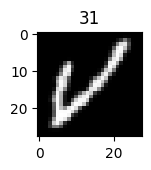

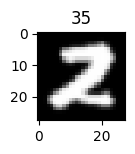

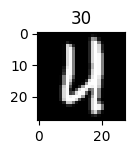

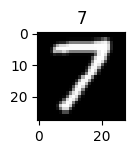

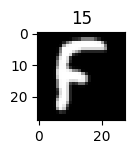

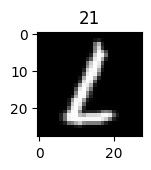

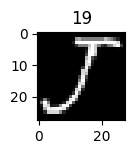

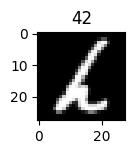

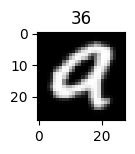

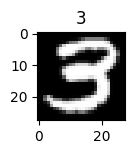

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def preprocess(image, label):
    image = tf.transpose(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    label = tf.one_hot(label, depth=47)
    return image, label
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
for images, labels in ds_train.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
#print the images

import matplotlib.pyplot as plt

for image,label in ds_train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().squeeze(),cmap='gray')
        plt.title(np.argmax(label[i],axis=0))
        plt.tight_layout()
        plt.show()


In [3]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3,min_delta=0.001)
history = hybrid_model.fit(ds_train,epochs=30,batch_size=64,validation_data=ds_test)

Epoch 1/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.2748 - loss: 2.5355 - val_accuracy: 0.8010 - val_loss: 0.6024
Epoch 2/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.7785 - loss: 0.6857 - val_accuracy: 0.8384 - val_loss: 0.4647
Epoch 3/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8301 - loss: 0.5164 - val_accuracy: 0.8629 - val_loss: 0.4048
Epoch 4/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8445 - loss: 0.4597 - val_accuracy: 0.8725 - val_loss: 0.3706
Epoch 5/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8582 - loss: 0.4194 - val_accuracy: 0.8761 - val_loss: 0.3624
Epoch 6/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8639 - loss: 0.3960 - val_accuracy: 0.8817 - val_loss: 0.3444
Epoch 7/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8682 - loss: 0.3788 - val_accuracy: 0.8801 - val_loss: 0.3458
Epoch 8/30
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8729 - loss: 0.3670 - 

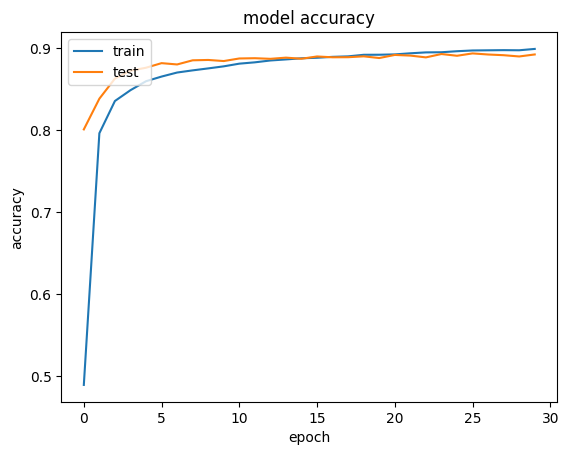

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

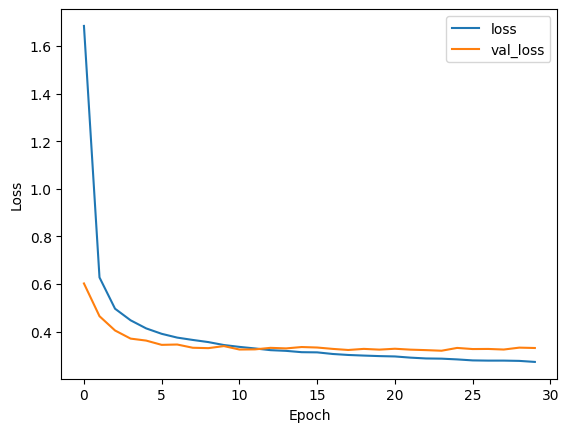

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
hybrid_model.save('new_hybrid_model_40_epochs_no_Earlystop.keras')

In [12]:
from google.colab import files
files.download('new_hybrid_model_40_epochs_no_Earlystop.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
history_40_epochs = hybrid_model.fit(ds_train,epochs=40,batch_size=64,validation_data=ds_test)

Epoch 1/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9085 - loss: 0.2408 - val_accuracy: 0.8925 - val_loss: 0.3345
Epoch 2/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9104 - loss: 0.2377 - val_accuracy: 0.8927 - val_loss: 0.3332
Epoch 3/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9091 - loss: 0.2406 - val_accuracy: 0.8925 - val_loss: 0.3450
Epoch 4/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9083 - loss: 0.2367 - val_accuracy: 0.8921 - val_loss: 0.3421
Epoch 5/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9090 - loss: 0.2403 - val_accuracy: 0.8923 - val_loss: 0.3415
Epoch 6/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9084 - loss: 0.2384 - val_accuracy: 0.8927 - val_loss: 0.3331
Epoch 7/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9081 - loss: 0.2405 - val_accuracy: 0.8940 - val_loss: 0.3343
Epoch 8/40
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9086 - loss: 0.2370 - 